<h2 style="text-align: center;"><b>Задание</b></h2>

Добейтесь как можно лучшего качества в соревновании!  

Используйте знания, полученные на занятиях и те, которые вы найдёте в интернете. Если у вас получится, можете использовать и свёрточные нейросети, а не только полносвязные. Вам нужно как минимум побить baseline.

*Рекомендация*: попробуйте поменять количество итераций, количество нейронов, количество слоёв, гиперпараметры сети (learning_rate, метод оптимизации вместо SGD можно взять другой)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import torch

In [2]:
TRAIN_PATH = './fashionmnist/fashion-mnist_train.csv'
TEST_PATH = './fashionmnist/fashion-mnist_test.csv'

In [3]:
train_df = pd.read_csv(TRAIN_PATH)
test_df = pd.read_csv(TEST_PATH)

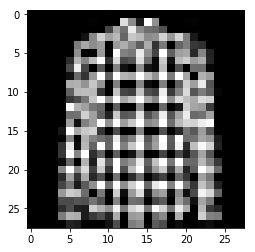

In [4]:
shirts = train_df[train_df['label'] == 6]
plt.imshow(shirts.values[14][1:].reshape(28, 28), cmap='gray');

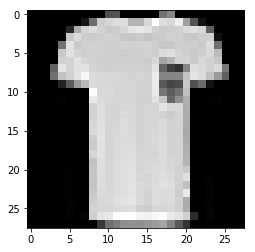

In [5]:
tops = train_df[train_df['label'] == 0]
plt.imshow(tops.values[10][1:].reshape(28, 28), cmap='gray');

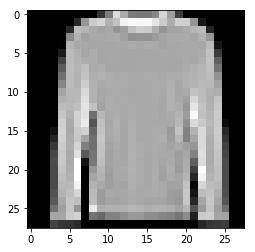

In [6]:
pullovers = train_df[train_df['label'] == 2]
plt.imshow(pullovers.values[10][1:].reshape(28, 28), cmap='gray');

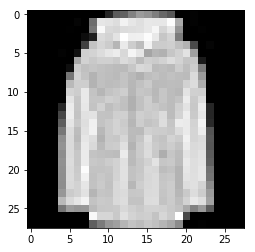

In [7]:
coats = train_df[train_df['label'] == 4]
plt.imshow(coats.values[10][1:].reshape(28, 28), cmap='gray');

In [18]:
X_train = train_df.values[:, 1:]
y_train = train_df.values[:, 0]

X_test = test_df.values  # [:, 1:]  # удаляем столбец 'label'

In [19]:
X_train_tensor = torch.FloatTensor(X_train)
y_train_tensor = torch.LongTensor(y_train.astype(np.int64))

In [20]:
D_in, H, D_out = 784, 200, 10

# определим нейросеть:
net = torch.nn.Sequential(
    torch.nn.Linear(D_in, H),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H, H),
    torch.nn.LeakyReLU(),
    torch.nn.Linear(H, D_out),
    #torch.nn.Softmax()
    torch.nn.ELU()
)

In [21]:
def generate_batches(X, y, batch_size=64):
    for i in range(0, X.shape[0], batch_size):
        X_batch, y_batch = X[i:i+batch_size], y[i:i+batch_size]
        yield X_batch, y_batch

In [22]:
BATCH_SIZE = 392
NUM_EPOCHS = 200

loss_fn = torch.nn.CrossEntropyLoss(size_average=False)

learning_rate = 1e-4
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)

for epoch_num  in range(NUM_EPOCHS):
    iter_num = 0
    running_loss = 0.0
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        loss = loss_fn(y_pred, y_batch)
        running_loss += loss.item()
            
        if iter_num % 100 == 99:
            print('[{}, {}] current loss: {}'.format(epoch_num, iter_num + 1, running_loss / 100))
            running_loss = 0.0
            
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        iter_num += 1

C:\Users\yushanov\Anaconda3\lib\site-packages\torch\nn\_reduction.py:49: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))


[0, 100] current loss: 708.8970080566406
[1, 100] current loss: 554.1288986206055
[2, 100] current loss: 442.6788348388672
[3, 100] current loss: 311.3433599853516
[4, 100] current loss: 295.35279312133787
[5, 100] current loss: 285.4838264465332
[6, 100] current loss: 278.93015396118165
[7, 100] current loss: 273.4941995239258
[8, 100] current loss: 268.76436264038085
[9, 100] current loss: 264.5602394104004
[10, 100] current loss: 261.0401202392578
[11, 100] current loss: 257.3403570556641
[12, 100] current loss: 254.1128028869629
[13, 100] current loss: 238.57097534179687
[14, 100] current loss: 142.2894864654541
[15, 100] current loss: 120.60542121887207
[16, 100] current loss: 109.26393661499023
[17, 100] current loss: 101.93383850097656
[18, 100] current loss: 96.35250610351562
[19, 100] current loss: 91.95931205749511
[20, 100] current loss: 86.76459140777588
[21, 100] current loss: 83.41063755035401
[22, 100] current loss: 80.07852378845215
[23, 100] current loss: 76.8243369293

[192, 100] current loss: 6.798054850101471
[193, 100] current loss: 5.310201017856598
[194, 100] current loss: 6.985716345310212
[195, 100] current loss: 6.932019517421723
[196, 100] current loss: 6.186879305839539
[197, 100] current loss: 5.907659313678741
[198, 100] current loss: 6.819088933467865
[199, 100] current loss: 6.859517545700073


In [23]:
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
           'Sandal', 'Shirt', 'Sneaker','Bag', 'Ankle boot']

with torch.no_grad():
    for X_batch, y_batch in generate_batches(X_train_tensor, y_train_tensor, BATCH_SIZE):
        y_pred = net(X_batch)
        _, predicted = torch.max(y_pred, 1)
        c = (predicted == y_batch).squeeze()
        for i in range(len(y_pred)):
            label = y_batch[i]
            class_correct[label] += c[i].item()
            class_total[label] += 1


for i in range(10):
    print('Accuracy of %5s : %2d %%' % (
        classes[i], 100 * class_correct[i] / class_total[i]))

Accuracy of T-shirt/top : 95 %
Accuracy of Trouser : 99 %
Accuracy of Pullover : 97 %
Accuracy of Dress : 99 %
Accuracy of  Coat : 95 %
Accuracy of Sandal : 100 %
Accuracy of Shirt : 96 %
Accuracy of Sneaker : 99 %
Accuracy of   Bag : 99 %
Accuracy of Ankle boot : 99 %


In [24]:
y_test_pred = net(torch.FloatTensor(X_test))

In [25]:
_, predicted = torch.max(y_test_pred, 1)
answer_df = pd.DataFrame(data=predicted.numpy(), columns=['Category'])
answer_df['Id'] = answer_df.index
answer_df.to_csv('./newline.csv', index=False)

In [26]:
print('H = {}\nBATCH_SIZE = {}\nNUM_EPOCHS = {}\nlearning_rate = {}\nloss_fn = {}\nnet.parameters = {}'.format(H, BATCH_SIZE, NUM_EPOCHS, learning_rate, loss_fn, net.parameters))

H = 200
BATCH_SIZE = 392
NUM_EPOCHS = 200
learning_rate = 0.0001
loss_fn = CrossEntropyLoss()
net.parameters = <bound method Module.parameters of Sequential(
  (0): Linear(in_features=784, out_features=200, bias=True)
  (1): LeakyReLU(negative_slope=0.01)
  (2): Linear(in_features=200, out_features=200, bias=True)
  (3): LeakyReLU(negative_slope=0.01)
  (4): Linear(in_features=200, out_features=10, bias=True)
  (5): ELU(alpha=1.0)
)>
